In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests

In [2]:
TRAIN = '開盤價'
TARGET = '收盤價'

In [3]:
url = "https://api.finmindtrade.com/api/v4/login"
account = {
    "user_id": "F74086250",
    "password": "Aeiou95048",
}
token = requests.post(url, data=account).json()['token']

url = "https://api.finmindtrade.com/api/v4/data"
parameter = {
    "dataset": "TaiwanStockPrice",
    "data_id": "2330",
    "start_date": "2016-06-04",
    "end_date": "2021-06-04",
    "token":token
}
data = pd.DataFrame(requests.get(url, params=parameter).json()["data"])
data['average'] = data["Trading_money"]/data["Trading_Volume"]
data

,date,stock_id,Trading_Volume,Trading_money,open,max,min,close,spread,Trading_turnover,average
0,2016-06-04,2330,2631269,420392883,160.0,160.0,159.5,160.0,-0.5,1428,159.768113
1,2016-06-06,2330,28898951,4651663660,161.0,162.0,160.0,161.0,1.0,8667,160.963063
2,2016-06-07,2330,47573770,7726094806,161.5,163.5,161.0,162.0,1.0,12269,162.402408
3,2016-06-08,2330,45587946,7522713617,164.0,166.0,163.5,165.5,3.5,15173,165.015410
4,2016-06-13,2330,54689228,8843806836,161.0,162.5,161.0,162.0,-3.5,14466,161.710215
...,...,...,...,...,...,...,...,...,...,...,...
1218,2021-05-31,2330,31557426,18751716595,595.0,597.0,590.0,597.0,7.0,29798,594.209318
1219,2021-06-01,2330,18405285,10985893229,598.0,599.0,595.0,598.0,1.0,20318,596.887972
1220,2021-06-02,2330,22416789,13362065937,600.0,600.0,593.0,595.0,-3.0,25170,596.074038
1221,2021-06-03,2330,31703679,18939839664,600.0,600.0,596.0,596.0,1.0,20749,597.401950


In [46]:
#取得個股的融資卷增減量(張) (data2)
parameter = {
    "dataset": "TaiwanStockMarginPurchaseShortSale",
    "data_id": "2330",
    "start_date": "2016-06-04",
    "token":token, # 參考登入，獲取金鑰
}
data2 = requests.get(url, params=parameter).json()
data2 = pd.DataFrame(data2['data'])
data2=data2[["MarginPurchaseTodayBalance","MarginPurchaseYesterdayBalance","ShortSaleTodayBalance","ShortSaleYesterdayBalance"]]
data2["MarginPurchaseVariation"]=data2["MarginPurchaseTodayBalance"]-data2["MarginPurchaseYesterdayBalance"]
data2["ShortSaleVariation"]=data2["ShortSaleTodayBalance"]-data2["ShortSaleYesterdayBalance"]
data2

#data2=data2.drop(1222,axis=0)
data2

,MarginPurchaseTodayBalance,MarginPurchaseYesterdayBalance,ShortSaleTodayBalance,ShortSaleYesterdayBalance,MarginPurchaseVariation,ShortSaleVariation
0,12041,12067,3739,3812,-26,-73
1,11781,12041,3774,3739,-260,35
2,11608,11781,4261,3774,-173,487
3,11172,11608,4323,4261,-436,62
4,11216,11172,3277,4323,44,-1046
...,...,...,...,...,...,...
1218,30585,31552,384,427,-967,-43
1219,30208,30585,377,384,-377,-7
1220,30242,30208,365,377,34,-12
1221,30643,30242,325,365,401,-40


In [47]:
#取得個股的股利,本益比,淨值比(data3)
parameter = {
    "dataset": "TaiwanStockPER",
    "data_id": "2330",
    "start_date": "2016-06-04",
    "token":token, # 參考登入，獲取金鑰
}
data3 = requests.get(url, params=parameter).json()
data3 = pd.DataFrame(data3['data'])
data3=data3.drop(["date","stock_id"],axis=1)

#data3=data3.drop(1222,axis=0)
data3

,dividend_yield,PER,PBR
0,3.75,14.20,3.24
1,3.73,14.29,3.26
2,3.70,14.37,3.28
3,3.63,14.69,3.35
4,3.70,14.37,3.28
...,...,...,...
1218,1.68,28.63,7.98
1219,1.67,28.68,8.00
1220,1.68,28.54,7.96
1221,1.68,28.59,7.97


In [48]:
#取得大盤的融資餘額(百萬)以及融卷張數 (data4)
parameter = {
    "dataset": "TaiwanStockTotalMarginPurchaseShortSale",
    "start_date": "2016-06-04",
    "token":token, # 參考登入，獲取金鑰
}
data4 = requests.get(url, params=parameter).json()
data4 = pd.DataFrame(data4['data'])[["TodayBalance","name"]]
data4=data4[~data4['name'].isin(["MarginPurchase"])]
MarginPurchaseMoney=data4[data4["name"]=="MarginPurchaseMoney"].drop(columns="name")
MarginPurchaseMoney.rename(columns={"TodayBalance":"MarginPurchaseMoney"})
MarginPurchaseMoney=MarginPurchaseMoney["TodayBalance"]/10000000
MarginPurchaseMoney=MarginPurchaseMoney.to_frame().rename(columns={"TodayBalance":"MarginPurchaseMoney"})
ShortSale=data4[data4["name"]=="ShortSale"].drop(columns="name")
ShortSale=ShortSale.rename(columns={"TodayBalance":"Shortsale"})
mod=list(range(len(data)))
MarginPurchaseMoney=MarginPurchaseMoney.set_axis(mod)
ShortSale=ShortSale.set_axis(mod)
data4=MarginPurchaseMoney.join(ShortSale)
data4

#data4=data4.drop(1222,axis=0)
data4

,MarginPurchaseMoney,Shortsale
0,12994.9943,360288
1,12967.5393,368731
2,12935.2080,379136
3,12945.7301,378743
4,12925.4617,355334
...,...,...
1218,23404.7805,551036
1219,24012.6099,563095
1220,24049.8196,550856
1221,24595.8470,559529


In [51]:
data5 = pd.read_csv('TAIEX.csv')
data5=data5.iloc[::-1]
mod=list(range(len(data)))
data5=data5.set_axis(mod).drop(["Date","Return",'Percent'],axis=1)
data5.columns = ['大盤指數','漲跌點數']
data5

,大盤指數,漲跌點數
0,8591.57,4.21
1,8597.11,5.54
2,8679.90,82.79
3,8715.48,35.58
4,8536.22,-179.26
...,...,...
1218,17068.43,197.57
1219,17162.38,93.95
1220,17165.04,2.66
1221,17246.16,81.12


In [52]:
#將多張dataframe合併
data=data.join(data2)
data=data.join(data3)
data=data.join(data4)
data=data.join(data5)
data

ValueError: columns overlap but no suffix specified: Index(['MarginPurchaseTodayBalance', 'MarginPurchaseYesterdayBalance',
       'ShortSaleTodayBalance', 'ShortSaleYesterdayBalance',
       'MarginPurchaseVariation', 'ShortSaleVariation'],
      dtype='object')

In [12]:
data.columns=["日期","股票編號","當日成交量","當日成交金額","開盤價","最高價","最低價","收盤價","買賣價差","周轉率",'平均成交價',"當日融資","昨日融資","當日融卷","昨日融卷","融資變化","融券變化","殖利率","本益比","股價淨值比","大盤融資餘額(百萬)","大盤融卷量","大盤指數","大盤漲跌"]

In [13]:
for column in data:
    print(column)
data

日期
股票編號
當日成交量
當日成交金額
開盤價
最高價
最低價
收盤價
買賣價差
周轉率
平均成交價
當日融資
昨日融資
當日融卷
昨日融卷
融資變化
融券變化
殖利率
本益比
股價淨值比
大盤融資餘額(百萬)
大盤融卷量
大盤指數
大盤漲跌


,日期,股票編號,當日成交量,當日成交金額,開盤價,最高價,最低價,收盤價,買賣價差,周轉率,...,昨日融卷,融資變化,融券變化,殖利率,本益比,股價淨值比,大盤融資餘額(百萬),大盤融卷量,大盤指數,大盤漲跌
0,2016-06-04,2330,2631269,420392883,160.0,160.0,159.5,160.0,-0.5,1428,...,3812.0,-26.0,-73.0,3.75,14.20,3.24,12994.9943,360288.0,8591.57,4.21
1,2016-06-06,2330,28898951,4651663660,161.0,162.0,160.0,161.0,1.0,8667,...,3739.0,-260.0,35.0,3.73,14.29,3.26,12967.5393,368731.0,8597.11,5.54
2,2016-06-07,2330,47573770,7726094806,161.5,163.5,161.0,162.0,1.0,12269,...,3774.0,-173.0,487.0,3.70,14.37,3.28,12935.2080,379136.0,8679.90,82.79
3,2016-06-08,2330,45587946,7522713617,164.0,166.0,163.5,165.5,3.5,15173,...,4261.0,-436.0,62.0,3.63,14.69,3.35,12945.7301,378743.0,8715.48,35.58
4,2016-06-13,2330,54689228,8843806836,161.0,162.5,161.0,162.0,-3.5,14466,...,4323.0,44.0,-1046.0,3.70,14.37,3.28,12925.4617,355334.0,8536.22,-179.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1218,2021-05-31,2330,31557426,18751716595,595.0,597.0,590.0,597.0,7.0,29798,...,427.0,-967.0,-43.0,1.68,28.63,7.98,23404.7805,551036.0,17068.43,197.57
1219,2021-06-01,2330,18405285,10985893229,598.0,599.0,595.0,598.0,1.0,20318,...,384.0,-377.0,-7.0,1.67,28.68,8.00,24012.6099,563095.0,17162.38,93.95
1220,2021-06-02,2330,22416789,13362065937,600.0,600.0,593.0,595.0,-3.0,25170,...,377.0,34.0,-12.0,1.68,28.54,7.96,24049.8196,550856.0,17165.04,2.66
1221,2021-06-03,2330,31703679,18939839664,600.0,600.0,596.0,596.0,1.0,20749,...,365.0,401.0,-40.0,1.68,28.59,7.97,24595.8470,559529.0,17246.16,81.12


In [14]:
data.head()

,日期,股票編號,當日成交量,當日成交金額,開盤價,最高價,最低價,收盤價,買賣價差,周轉率,...,昨日融卷,融資變化,融券變化,殖利率,本益比,股價淨值比,大盤融資餘額(百萬),大盤融卷量,大盤指數,大盤漲跌
0,2016-06-04,2330,2631269,420392883,160.0,160.0,159.5,160.0,-0.5,1428,...,3812.0,-26.0,-73.0,3.75,14.20,3.24,12994.9943,360288.0,8591.57,4.21
1,2016-06-06,2330,28898951,4651663660,161.0,162.0,160.0,161.0,1.0,8667,...,3739.0,-260.0,35.0,3.73,14.29,3.26,12967.5393,368731.0,8597.11,5.54
2,2016-06-07,2330,47573770,7726094806,161.5,163.5,161.0,162.0,1.0,12269,...,3774.0,-173.0,487.0,3.70,14.37,3.28,12935.2080,379136.0,8679.90,82.79
3,2016-06-08,2330,45587946,7522713617,164.0,166.0,163.5,165.5,3.5,15173,...,4261.0,-436.0,62.0,3.63,14.69,3.35,12945.7301,378743.0,8715.48,35.58
4,2016-06-13,2330,54689228,8843806836,161.0,162.5,161.0,162.0,-3.5,14466,...,4323.0,44.0,-1046.0,3.70,14.37,3.28,12925.4617,355334.0,8536.22,-179.26


<ipython-input-15-ef47dcf5ec4c>:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1 = fig.add_subplot(111)
c:\users\f74086250\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 25910 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\f74086250\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 30436 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\f74086250\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 20729 missing from current font.
  font.set_text(s, 0.

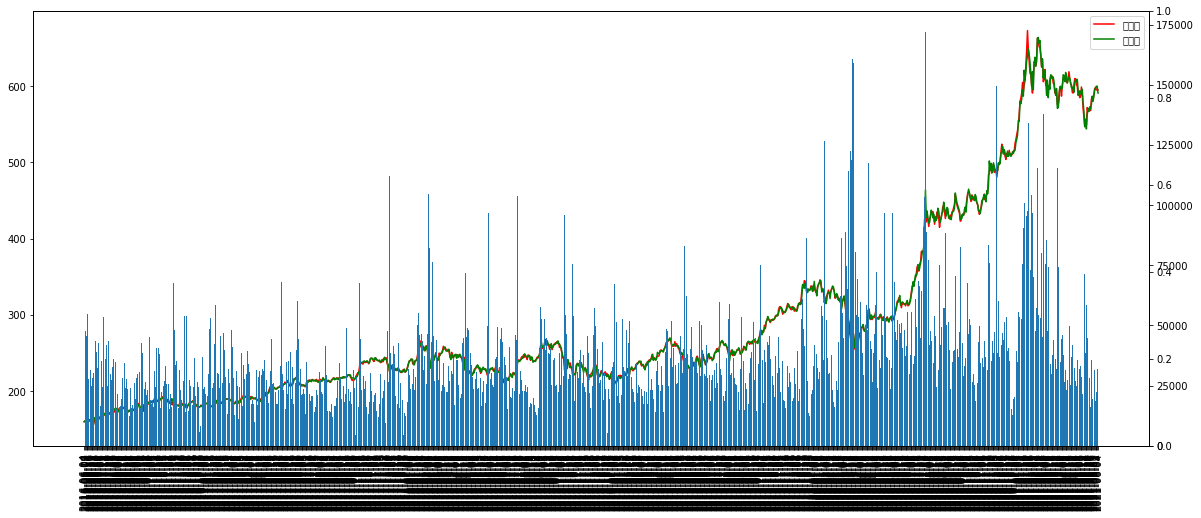

In [15]:
fig=plt.figure(figsize=(20,8))
plt.xticks(rotation = 90)  
ax1 = fig.add_subplot(111)
ax1.plot(data.收盤價,color='red',label='收盤價')
ax1.plot(data.開盤價,color='green',label='開盤價')
plt.legend()
# twin 為共享x軸
ax2= ax1.twinx()
plt.bar(data.日期,data.當日成交量.astype('int')//1000)
ax3 = ax1.twinx()
plt.savefig('2330_year.png')

In [16]:
#切分Test集
test = data[data.日期>'2020-06-04']
train = data[data.日期<='2021-06-04']
#只要open high
train_set_x = train[TRAIN]
train_set_y = train[TARGET]


In [17]:
from sklearn.preprocessing import MinMaxScaler 
sc = MinMaxScaler(feature_range = (0, 1))
#需將資料做reshape的動作，使其shape為(資料長度,1) 
train_set_x= train_set_x.values.reshape(-1,1)
training_set_scaled_x = sc.fit_transform(train_set_x)
train_set_y= train_set_y.values.reshape(-1,1)
training_set_scaled_y = sc.fit_transform(train_set_y)

In [18]:
training_set_scaled_x

array([[0.0107949 ],
       [0.01275761],
       [0.01373896],
       ...,
       [0.87438665],
       [0.87438665],
       [0.85672228]])

In [19]:
len(train_set_x),len(train_set_y),len(training_set_scaled_x),len(training_set_scaled_y)

(1223, 1223, 1223, 1223)

In [20]:
X_train = [] 
y_train = []
for i in range(10,len(train_set_x)):
    X_train.append(training_set_scaled_x[i-10:i, 0]) 
    y_train.append(training_set_scaled_y[i, 0]) 
X_train, y_train = np.array(X_train), np.array(y_train) 
X_train = np.reshape(X_train, 
                         (X_train.shape[0], X_train.shape[1], 1))
X_train,y_train

(array([[[0.0107949 ],
         [0.01275761],
         [0.01373896],
         ...,
         [0.01373896],
         [0.01570167],
         [0.01962709]],
 
        [[0.01275761],
         [0.01373896],
         [0.01864573],
         ...,
         [0.01570167],
         [0.01962709],
         [0.01864573]],
 
        [[0.01373896],
         [0.01864573],
         [0.01275761],
         ...,
         [0.01962709],
         [0.01864573],
         [0.01962709]],
 
        ...,
 
        [[0.81746811],
         [0.80961727],
         [0.81943081],
         ...,
         [0.84887144],
         [0.86457311],
         [0.87046124]],
 
        [[0.80961727],
         [0.81943081],
         [0.8155054 ],
         ...,
         [0.86457311],
         [0.87046124],
         [0.87438665]],
 
        [[0.81943081],
         [0.8155054 ],
         [0.82728165],
         ...,
         [0.87046124],
         [0.87438665],
         [0.87438665]]]),
 array([0.01932367, 0.02028986, 0.01642512, ..., 0.8492

In [21]:
X_train[0],y_train[0]

(array([[0.0107949 ],
        [0.01275761],
        [0.01373896],
        [0.01864573],
        [0.01275761],
        [0.01275761],
        [0.01472031],
        [0.01373896],
        [0.01570167],
        [0.01962709]]),
 0.01932367149758457)

In [22]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout,BatchNormalization

In [23]:
keras.backend.clear_session()
regressor = Sequential()
regressor.add(LSTM(units = 100, input_shape = (X_train.shape[1], 1)))
regressor.add(Dense(units = 1))
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [24]:
regressor.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100)               40800     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


Epoch 1/150
76/76 [==============================] - 19s 5ms/step - loss: 0.0296
Epoch 2/150
76/76 [==============================] - 1s 9ms/step - loss: 6.1934e-04
Epoch 3/150
76/76 [==============================] - 1s 9ms/step - loss: 4.3194e-04
Epoch 4/150
76/76 [==============================] - 0s 5ms/step - loss: 4.6040e-04
Epoch 5/150
76/76 [==============================] - 0s 4ms/step - loss: 5.9651e-04
Epoch 6/150
76/76 [==============================] - 0s 4ms/step - loss: 4.5273e-04
Epoch 7/150
76/76 [==============================] - 0s 4ms/step - loss: 4.3208e-04
Epoch 8/150
76/76 [==============================] - 0s 5ms/step - loss: 3.9710e-04
Epoch 9/150
76/76 [==============================] - 1s 10ms/step - loss: 4.5003e-04
Epoch 10/150
76/76 [==============================] - 1s 9ms/step - loss: 3.9012e-04
Epoch 11/150
76/76 [==============================] - 0s 4ms/step - loss: 3.8376e-04
Epoch 12/150
76/76 [==============================] - 0s 4ms/step - loss: 4.

76/76 [==============================] - 0s 6ms/step - loss: 1.6195e-04
Epoch 98/150
76/76 [==============================] - 0s 6ms/step - loss: 1.5126e-04
Epoch 99/150
76/76 [==============================] - 0s 6ms/step - loss: 1.5100e-04
Epoch 100/150
76/76 [==============================] - 1s 7ms/step - loss: 1.6847e-04
Epoch 101/150
76/76 [==============================] - 0s 5ms/step - loss: 1.6575e-04
Epoch 102/150
76/76 [==============================] - 0s 5ms/step - loss: 1.8470e-04
Epoch 103/150
76/76 [==============================] - 0s 5ms/step - loss: 1.7391e-04
Epoch 104/150
76/76 [==============================] - 0s 6ms/step - loss: 1.6131e-04
Epoch 105/150
76/76 [==============================] - 0s 5ms/step - loss: 1.5505e-04
Epoch 106/150
76/76 [==============================] - 0s 5ms/step - loss: 1.6592e-04
Epoch 107/150
76/76 [==============================] - 0s 5ms/step - loss: 1.6442e-04
Epoch 108/150
76/76 [==============================] - 0s 5ms/step - l

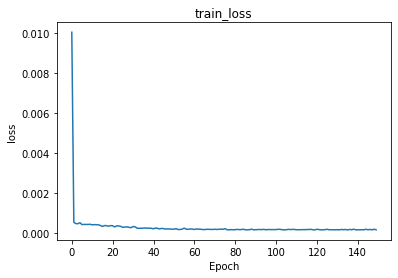

In [25]:
history = regressor.fit(X_train, y_train, epochs = 150, batch_size = 16)
plt.title('train_loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.plot( history.history["loss"])

In [26]:
dataset_total = pd.concat((train[TRAIN], test[TARGET]), axis = 0)
inputs = dataset_total[len(dataset_total) - len(test) - 10:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(10, len(inputs)):
    X_test.append(inputs[i-10:i, 0])
#print(X_test)
X_test = np.array(X_test)
print(type(X_test))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
#使用sc的 inverse_transform將股價轉為歸一化前
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

<class 'numpy.ndarray'>


In [27]:
def confusion_matrix(delay,test):
    real_tendency=[]
    predicted_tendency=[]
    df_test=test
    #delay=2
    real_tendency.append('NaN')
    predicted_tendency.append('NaN')
    gap=len(data)-len(test)
    for i in range(1,len(predicted_stock_price)-delay):
        if(test['收盤價'][i+gap]-test['收盤價'][i+gap-1]>0):
            real_tendency.append(1)
        if(test['收盤價'][i+gap]-test['收盤價'][i+gap-1]==0):
            real_tendency.append(0)
        if(test['收盤價'][i+gap]-test['收盤價'][i+gap-1]<0):
            real_tendency.append(-1)
        if(predicted_stock_price[i+delay]-predicted_stock_price[i+delay-1]>0):
            predicted_tendency.append(1)
        if(predicted_stock_price[i+delay]-predicted_stock_price[i+delay-1]==0):
            predicted_tendency.append(0)
        if(predicted_stock_price[i+delay]-predicted_stock_price[i+delay-1]<0):
            predicted_tendency.append(-1)
    real_tendency,predicted_tendency
    df_test=df_test.reset_index()
    for i in range(delay):
        real_tendency.append(0)
        predicted_tendency.append(0)

    df_test['real_tendency']=real_tendency
    df_test['predicted_stock_price']=predicted_stock_price
    df_test['predicted_tendency']=predicted_tendency
    count=0
    """
    for i in range(len(df_test)):
        if(df_test['real_tendency'][i]==df_test['predicted_tendency'][i]):
            count+=1
            print(df_test['date'][i],df_test['predicted_tendency'][i])
    print(len(test),count)
    """
    tp=0
    fp=0
    fn=0
    tn=0
    for i in range(1,len(df_test)):
        if(df_test['real_tendency'][i]==df_test['predicted_tendency'][i] and df_test['predicted_tendency'][i]==1):
            tp+=1
        if(df_test['real_tendency'][i]==df_test['predicted_tendency'][i] and df_test['predicted_tendency'][i]==-1):
            tn+=1
        if(df_test['real_tendency'][i]!=df_test['predicted_tendency'][i] and df_test['predicted_tendency'][i]==1 and df_test['real_tendency'][i]==-1):
            fp+=1
        if(df_test['real_tendency'][i]!=df_test['predicted_tendency'][i] and df_test['predicted_tendency'][i]==-1 and df_test['real_tendency'][i]==1):
            fn+=1
    tp,tn,fp,fn,len(df_test)-(delay+1)
    accuracy=(tp+tn)/(len(df_test)-(delay+1))
    precision=tp/(tp+fp)
    recall=tp/(tp+fn)
    f1_score=2/((1/precision)+(1/recall))
    print('delay day=',delay,' accuracy=',round(accuracy,6),' precision=',round(precision,6),' recall=',round(recall,6),' f1_score=',round(f1_score,6))
    return ""
for i in range(11):
    confusion_matrix(i,test)

delay day= 0  accuracy= 0.522634  precision= 0.587786  recall= 0.596899  f1_score= 0.592308
delay day= 1  accuracy= 0.900826  precision= 0.938931  recall= 0.953488  f1_score= 0.946154
delay day= 2  accuracy= 0.605809  precision= 0.664122  recall= 0.679688  f1_score= 0.671815
delay day= 3  accuracy= 0.475  precision= 0.546154  recall= 0.554688  f1_score= 0.550388
delay day= 4  accuracy= 0.493724  precision= 0.5625  recall= 0.566929  f1_score= 0.564706
delay day= 5  accuracy= 0.466387  precision= 0.535433  recall= 0.539683  f1_score= 0.537549
delay day= 6  accuracy= 0.493671  precision= 0.559055  recall= 0.568  f1_score= 0.563492
delay day= 7  accuracy= 0.512712  precision= 0.579365  recall= 0.584  f1_score= 0.581673
delay day= 8  accuracy= 0.557447  precision= 0.619048  recall= 0.629032  f1_score= 0.624
delay day= 9  accuracy= 0.529915  precision= 0.592  recall= 0.601626  f1_score= 0.596774
delay day= 10  accuracy= 0.446352  precision= 0.515873  recall= 0.528455  f1_score= 0.522088


predict by 開盤價


c:\users\f74086250\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 25910 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\f74086250\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 30436 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\f74086250\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 20729 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\f74086250\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 25910 missing from current font.
  font.set_text(s, 0, flags=flags)
c:\users\f74086250\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 30436 missing from current font.

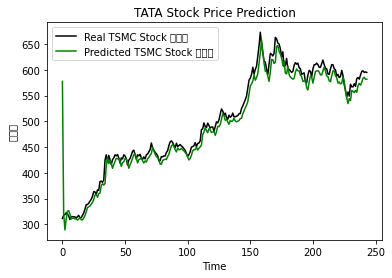

In [28]:
print('predict by',TRAIN)
plt.plot(test[TARGET].values, color = 'black', label = 'Real TSMC Stock'+' '+TARGET)
plt.plot(predicted_stock_price, color = 'green', label = 'Predicted TSMC Stock'+' '+TARGET)
plt.title('TATA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel(TARGET)
plt.legend()
plt.show()
# plt.savefig('lstm_2330.png')

In [29]:
keras.backend.clear_session()
regressor = Sequential()
regressor.add(LSTM(units = 100,return_sequences=True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 100,activation='relu'))
regressor.add(Dense(units = 1))
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [30]:
regressor.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 10, 100)           40800     
_________________________________________________________________
dropout (Dropout)            (None, 10, 100)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 121,301
Trainable params: 121,301
Non-trainable params: 0
_________________________________________________________________


Epoch 1/150
76/76 [==============================] - 9s 8ms/step - loss: 0.0186
Epoch 2/150
76/76 [==============================] - 1s 11ms/step - loss: 9.1559e-04
Epoch 3/150
76/76 [==============================] - 1s 17ms/step - loss: 5.8181e-04
Epoch 4/150
76/76 [==============================] - 1s 9ms/step - loss: 7.6822e-04
Epoch 5/150
76/76 [==============================] - 1s 9ms/step - loss: 6.4535e-04
Epoch 6/150
76/76 [==============================] - 1s 16ms/step - loss: 6.4309e-04
Epoch 7/150
76/76 [==============================] - 1s 11ms/step - loss: 5.7705e-04
Epoch 8/150
76/76 [==============================] - 1s 8ms/step - loss: 6.7912e-04
Epoch 9/150
76/76 [==============================] - 1s 10ms/step - loss: 7.8557e-04
Epoch 10/150
76/76 [==============================] - 1s 11ms/step - loss: 5.6335e-04
Epoch 11/150
76/76 [==============================] - 1s 11ms/step - loss: 4.8699e-04
Epoch 12/150
76/76 [==============================] - 1s 11ms/step - lo

76/76 [==============================] - 1s 10ms/step - loss: 2.4375e-04
Epoch 97/150
76/76 [==============================] - 1s 12ms/step - loss: 2.4579e-04
Epoch 98/150
76/76 [==============================] - 1s 12ms/step - loss: 2.3721e-04
Epoch 99/150
76/76 [==============================] - 1s 10ms/step - loss: 2.4169e-04
Epoch 100/150
76/76 [==============================] - 1s 11ms/step - loss: 2.3116e-04
Epoch 101/150
76/76 [==============================] - 1s 10ms/step - loss: 2.4578e-04
Epoch 102/150
76/76 [==============================] - 1s 10ms/step - loss: 2.6627e-04
Epoch 103/150
76/76 [==============================] - 1s 10ms/step - loss: 2.6261e-04
Epoch 104/150
76/76 [==============================] - 1s 11ms/step - loss: 3.5983e-04
Epoch 105/150
76/76 [==============================] - 1s 11ms/step - loss: 2.7391e-04
Epoch 106/150
76/76 [==============================] - 1s 11ms/step - loss: 2.5127e-04
Epoch 107/150
76/76 [==============================] - 1s 11

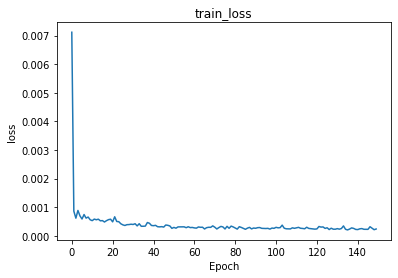

In [31]:
history = regressor.fit(X_train, y_train, epochs = 150, batch_size = 16)
plt.title('train_loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.plot( history.history["loss"])

In [32]:
dataset_total = pd.concat((train[TRAIN], test[TARGET]), axis = 0)
print(len(dataset_total),len(test))
inputs = dataset_total[len(dataset_total) - len(test) - 10:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
print(len(inputs))
X_test = []
for i in range(10, len(inputs)):
    X_test.append(inputs[i-10:i-1, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(len(X_test))
predicted_stock_price = regressor.predict(X_test)
#使用sc的 inverse_transform將股價轉為歸一化前
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1467 244
254
244


In [33]:
for i in range(10):
    confusion_matrix(i,test)

delay day= 0  accuracy= 0.481481  precision= 0.549618  recall= 0.55814  f1_score= 0.553846
delay day= 1  accuracy= 0.524793  precision= 0.590909  recall= 0.604651  f1_score= 0.597701
delay day= 2  accuracy= 0.879668  precision= 0.909774  recall= 0.945312  f1_score= 0.927203
delay day= 3  accuracy= 0.620833  precision= 0.679389  recall= 0.695312  f1_score= 0.687259
delay day= 4  accuracy= 0.493724  precision= 0.560606  recall= 0.582677  f1_score= 0.571429
delay day= 5  accuracy= 0.504202  precision= 0.569231  recall= 0.587302  f1_score= 0.578125
delay day= 6  accuracy= 0.455696  precision= 0.523438  recall= 0.536  f1_score= 0.529644
delay day= 7  accuracy= 0.474576  precision= 0.542636  recall= 0.56  f1_score= 0.551181
delay day= 8  accuracy= 0.514894  precision= 0.578125  recall= 0.596774  f1_score= 0.587302
delay day= 9  accuracy= 0.547009  precision= 0.604651  recall= 0.634146  f1_score= 0.619048


In [34]:
# calculate RMSE
from math import sqrt
from sklearn.metrics import mean_squared_error

rmse = sqrt(mean_squared_error(test[TARGET],predicted_stock_price))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 30.953


drop out version,predict by 開盤價


c:\users\f74086250\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 25910 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\f74086250\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 30436 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\f74086250\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 20729 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\f74086250\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 25910 missing from current font.
  font.set_text(s, 0, flags=flags)
c:\users\f74086250\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 30436 missing from current font.

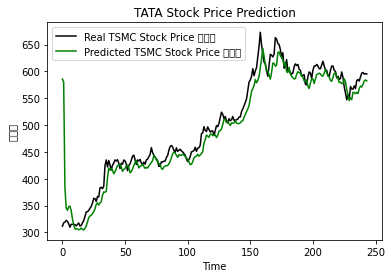

In [35]:
print('drop out version,predict by',TRAIN)
plt.plot(test[TARGET].values, color = 'black', label = 'Real TSMC Stock Price '+TARGET)
plt.plot(predicted_stock_price, color = 'green', label = 'Predicted TSMC Stock Price '+TARGET)
plt.title('TATA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel(TARGET)
plt.legend()
plt.show()
# plt.savefig('lstm_2330.png')

In [36]:
df=data
df

,日期,股票編號,當日成交量,當日成交金額,開盤價,最高價,最低價,收盤價,買賣價差,周轉率,...,昨日融卷,融資變化,融券變化,殖利率,本益比,股價淨值比,大盤融資餘額(百萬),大盤融卷量,大盤指數,大盤漲跌
0,2016-06-04,2330,2631269,420392883,160.0,160.0,159.5,160.0,-0.5,1428,...,3812.0,-26.0,-73.0,3.75,14.20,3.24,12994.9943,360288.0,8591.57,4.21
1,2016-06-06,2330,28898951,4651663660,161.0,162.0,160.0,161.0,1.0,8667,...,3739.0,-260.0,35.0,3.73,14.29,3.26,12967.5393,368731.0,8597.11,5.54
2,2016-06-07,2330,47573770,7726094806,161.5,163.5,161.0,162.0,1.0,12269,...,3774.0,-173.0,487.0,3.70,14.37,3.28,12935.2080,379136.0,8679.90,82.79
3,2016-06-08,2330,45587946,7522713617,164.0,166.0,163.5,165.5,3.5,15173,...,4261.0,-436.0,62.0,3.63,14.69,3.35,12945.7301,378743.0,8715.48,35.58
4,2016-06-13,2330,54689228,8843806836,161.0,162.5,161.0,162.0,-3.5,14466,...,4323.0,44.0,-1046.0,3.70,14.37,3.28,12925.4617,355334.0,8536.22,-179.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1218,2021-05-31,2330,31557426,18751716595,595.0,597.0,590.0,597.0,7.0,29798,...,427.0,-967.0,-43.0,1.68,28.63,7.98,23404.7805,551036.0,17068.43,197.57
1219,2021-06-01,2330,18405285,10985893229,598.0,599.0,595.0,598.0,1.0,20318,...,384.0,-377.0,-7.0,1.67,28.68,8.00,24012.6099,563095.0,17162.38,93.95
1220,2021-06-02,2330,22416789,13362065937,600.0,600.0,593.0,595.0,-3.0,25170,...,377.0,34.0,-12.0,1.68,28.54,7.96,24049.8196,550856.0,17165.04,2.66
1221,2021-06-03,2330,31703679,18939839664,600.0,600.0,596.0,596.0,1.0,20749,...,365.0,401.0,-40.0,1.68,28.59,7.97,24595.8470,559529.0,17246.16,81.12


In [37]:
df.columns=["日期","股票編號","當日成交量","當日成交金額","開盤價","最高價","最低價","收盤價","買賣價差","周轉率",'平均成交價',"當日融資","昨日融資","當日融卷","昨日融卷","融卷變化","融資變化","殖利率","本益比","股價淨值比","大盤融資餘額(百萬)","大盤融卷量","大盤指數","大盤漲跌"]
df=df.drop("股票編號",axis=1)
df.set_index(["日期"], inplace=True)
df.insert(loc=0,column="price",value=df["收盤價"].tolist())
df=df.drop("收盤價",axis=1)

In [38]:
for column in df:
    print(column,":",end="")
    print(df[column].rolling(10).corr(df['price']).mean(),"& ",end="")
    print(df[column].rolling(20).corr(df['price']).mean(),"& ",end="")
    print(df[column].rolling(30).corr(df['price']).mean(),"& ",end="")
    print(df[column].rolling(50).corr(df['price']).mean())

price :1.0000000000009481 & 1.0000000000005163 & 0.9999999999997041 & 1.000000000000203
當日成交量 :-0.06098766194998545 & -0.05337228866413051 & -0.05582947981118508 & -0.04121187761706528
當日成交金額 :-0.023555818888704082 & -0.003887433741232118 & 0.004112412595128915 & 0.04018324263821184
開盤價 :0.7735630907813249 & 0.8761901170612302 & 0.9156502508434894 & 0.950766510718819
最高價 :0.8979468096107057 & 0.9470591383526463 & 0.9641922948811293 & 0.9788266211357249
最低價 :0.9072586007923727 & 0.9512135407128044 & 0.9665760082000898 & 0.9800252522256229
買賣價差 :0.4479250437603086 & 0.3388278866908423 & 0.28144097986367994 & 0.21578236852701657
周轉率 :-0.04958129919127153 & -0.039764274077395655 & -0.03799138031232607 & -0.01493484149968627
平均成交價 :0.9516408047793974 & 0.9747106132795763 & 0.9825516875820395 & 0.9895889112731807
當日融資 :-0.6108921637783956 & -0.5553553371507433 & -0.5104394506348009 & -0.4440866989736907
昨日融資 :-0.33014910292490435 & -0.40943110762830154 & -0.419215521125947 & -0.3999626081316

In [39]:
df_new=df.drop(['平均成交價',"當日成交量","當日成交金額","周轉率","當日融卷","昨日融卷","當日融資","昨日融資","殖利率"],axis=1)
df_new

,price,開盤價,最高價,最低價,買賣價差,融卷變化,融資變化,本益比,股價淨值比,大盤融資餘額(百萬),大盤融卷量,大盤指數,大盤漲跌
日期,,,,,,,,,,,,,
2016-06-04,160.0,160.0,160.0,159.5,-0.5,-26.0,-73.0,14.20,3.24,12994.9943,360288.0,8591.57,4.21
2016-06-06,161.0,161.0,162.0,160.0,1.0,-260.0,35.0,14.29,3.26,12967.5393,368731.0,8597.11,5.54
2016-06-07,162.0,161.5,163.5,161.0,1.0,-173.0,487.0,14.37,3.28,12935.2080,379136.0,8679.90,82.79
2016-06-08,165.5,164.0,166.0,163.5,3.5,-436.0,62.0,14.69,3.35,12945.7301,378743.0,8715.48,35.58
2016-06-13,162.0,161.0,162.5,161.0,-3.5,44.0,-1046.0,14.37,3.28,12925.4617,355334.0,8536.22,-179.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-31,597.0,595.0,597.0,590.0,7.0,-967.0,-43.0,28.63,7.98,23404.7805,551036.0,17068.43,197.57
2021-06-01,598.0,598.0,599.0,595.0,1.0,-377.0,-7.0,28.68,8.00,24012.6099,563095.0,17162.38,93.95
2021-06-02,595.0,600.0,600.0,593.0,-3.0,34.0,-12.0,28.54,7.96,24049.8196,550856.0,17165.04,2.66


In [40]:
from sklearn.preprocessing import MinMaxScaler 
values = df_new.values
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
print(scaled)
scaled.shape[0]

[[0.00869565 0.0107949  0.00764818 ... 0.17531891 0.01452332 0.47088767]
 [0.01062802 0.01275761 0.01147228 ... 0.18363432 0.01512964 0.47178086]
 [0.01256039 0.01373896 0.01434034 ... 0.19388207 0.02419057 0.52365922]
 ...
 [0.84927536 0.87438665 0.84894837 ... 0.36300702 0.95284463 0.46984675]
 [0.85120773 0.87438665 0.84894837 ... 0.37154895 0.96172279 0.52253771]
 [0.84927536 0.85672228 0.83938815 ...        nan 0.95091512 0.40174338]]


1223

In [41]:
print(scaled)

[[0.00869565 0.0107949  0.00764818 ... 0.17531891 0.01452332 0.47088767]
 [0.01062802 0.01275761 0.01147228 ... 0.18363432 0.01512964 0.47178086]
 [0.01256039 0.01373896 0.01434034 ... 0.19388207 0.02419057 0.52365922]
 ...
 [0.84927536 0.87438665 0.84894837 ... 0.36300702 0.95284463 0.46984675]
 [0.85120773 0.87438665 0.84894837 ... 0.37154895 0.96172279 0.52253771]
 [0.84927536 0.85672228 0.83938815 ...        nan 0.95091512 0.40174338]]


In [42]:
from pandas import DataFrame
from pandas import concat

def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [43]:
reframed = series_to_supervised(scaled, 10, 1)
reframed

,var1(t-10),var2(t-10),var3(t-10),var4(t-10),var5(t-10),var6(t-10),var7(t-10),var8(t-10),var9(t-10),var10(t-10),...,var4(t),var5(t),var6(t),var7(t),var8(t),var9(t),var10(t),var11(t),var12(t),var13(t)
10,0.008696,0.010795,0.007648,0.010870,0.422222,0.459276,0.566676,0.018408,0.013616,0.216743,...,0.018775,0.466667,0.411701,0.218285,0.040957,0.030257,0.215691,0.167777,0.024732,0.507636
11,0.010628,0.012758,0.011472,0.011858,0.444444,0.423249,0.595889,0.022549,0.016641,0.215251,...,0.018775,0.437037,0.506390,0.566135,0.042798,0.031770,0.217775,0.161561,0.028169,0.489148
12,0.012560,0.013739,0.014340,0.013834,0.444444,0.436644,0.718150,0.026231,0.019667,0.213494,...,0.019763,0.400000,0.545804,0.586421,0.034514,0.025719,0.219316,0.162164,0.023838,0.441487
13,0.019324,0.018646,0.019120,0.018775,0.481481,0.396151,0.603192,0.040957,0.030257,0.214065,...,0.000988,0.355556,0.744727,0.586421,0.014266,0.010590,0.212193,0.142698,0.001983,0.333956
14,0.012560,0.012758,0.012428,0.013834,0.377778,0.470054,0.303489,0.026231,0.019667,0.212964,...,0.000000,0.429630,0.509777,0.854747,0.000000,0.000000,0.214689,0.142213,0.000000,0.455892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1217,0.775845,0.788027,0.776291,0.786561,0.577778,0.251116,0.609684,0.594110,0.650530,0.764957,...,0.845850,0.548148,0.481447,0.586962,0.667280,0.717095,0.778807,0.368395,0.920648,0.648879
1218,0.760386,0.764475,0.768642,0.764822,0.311111,0.345804,0.604274,0.576622,0.633888,0.676792,...,0.861660,0.533333,0.314396,0.574790,0.682467,0.730711,0.782516,0.363184,0.942271,0.600741
1219,0.804831,0.801766,0.797323,0.792490,0.770370,0.350885,0.599675,0.627243,0.680787,0.685867,...,0.871542,0.444444,0.405235,0.584528,0.684768,0.733737,0.815551,0.375061,0.952554,0.531154
1220,0.795169,0.817468,0.795411,0.812253,0.355556,0.392148,0.590749,0.616199,0.670197,0.698734,...,0.867589,0.385185,0.468514,0.583176,0.678325,0.727685,0.817574,0.363007,0.952845,0.469847


In [44]:
df_new.shape[1]

13

In [45]:
n_days=10
n_features = df_new.shape[1]
n_obs = n_days * n_features
train_X, train_y = train[:, 0:n_obs], train[:, -n_features]
test_X, test_y = test[:, 0:n_obs], test[:, -n_features]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], n_days, n_features))
test_X = test_X.reshape((test_X.shape[0], n_days, n_features))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

TypeError: '(slice(None, None, None), slice(0, 130, None))' is an invalid key

In [ ]:
keras.backend.clear_session()
regressor = Sequential()
regressor.add(LSTM(units = 100, input_shape = (train_X.shape[1], train_X.shape[2])))
regressor.add(Dense(units = 1))
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressor.add(Dropout(0.2))
regressor.summary()

In [ ]:
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=150, batch_size=256, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [ ]:
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], n_days*n_features))
from numpy import concatenate

inv_yhat = concatenate((yhat, test_X[:, -12:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
inv_yhat
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, -12:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
inv_y

# calculate RMSE
from math import sqrt
from sklearn.metrics import mean_squared_error

rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)
#inv_y 是實際股價
#inv_yhat 是預測


In [ ]:
print(len(inv_y),'\n',inv_y,'\n',len(inv_yhat),'\n',inv_yhat)

In [ ]:
plt.plot(inv_y, color = 'black', label = 'Real TSMC Stock Price ')
plt.plot(inv_yhat, color = 'green', label = 'Predicted TSMC Stock Price')
plt.title('TSMC Stock Price Prediction')
plt.xlabel('Time')
#plt.ylabel(TARGET)
plt.legend()
plt.show()
# plt.savefig('lstm_2330.png')

In [ ]:
def confusion_matrix_list(real,predict):
    real_tendency=[]
    predicted_tendency=[]
    

    
    for i in range(1,len(real)):
        if(real[i]-real[i-1]>0):
            real_tendency.append(1)
        if(real[i]-real[i-1]==0):
            real_tendency.append(2)
        if(real[i]-real[i-1]<0):
            real_tendency.append(0)
    for i in range(1,len(predict)):
        if(predict[i]-predict[i-1]>0):
            predicted_tendency.append(1)
        if(predict[i]-predict[i-1]==0):
            pedicted_tendency.append(2)
        if(predict[i]-predict[i-1]<0):
            predicted_tendency.append(0)
    
    return real_tendency,predicted_tendency 

real,predict=confusion_matrix_list(inv_y,inv_yhat)
print(len(real),len(predict))
from sklearn.metrics import confusion_matrix
#tn,fp,fn,tp=confusion_matrix(real,predict).ravel()
matrix=confusion_matrix(real,predict,labels=[1,0,2])
#cm1=confusion_matrix(predict,real)
print(matrix)

from sklearn.metrics import classification_report
report=classification_report(real,predict,labels=[1,0,2])
print(report)

